In [ ]:
import pandas as pd

# Load the CSV data into a DataFrame
df = pd.read_csv('/content/loan_data_nov2023.csv')  # Replace 'your_data.csv' with the actual file path

# Display the first few rows of the DataFrame
print(df.head())

   default  amount  interest grade  years ownership   income  age
0        0    5000     10.65     B   10.0      RENT  24000.0   33
1        0    2400     10.99     C   25.0      RENT  12252.0   31
2        0   10000     13.49     C   13.0      RENT  49200.0   24
3        0    5000     10.99     A    3.0      RENT  36000.0   39
4        0    3000     10.99     E    9.0      RENT  48000.0   24


In [ ]:
# Explore the first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Explore basic statistics of the data
print(df.describe())

   default  amount  interest grade  years ownership   income  age
0        0    5000     10.65     B   10.0      RENT  24000.0   33
1        0    2400     10.99     C   25.0      RENT  12252.0   31
2        0   10000     13.49     C   13.0      RENT  49200.0   24
3        0    5000     10.99     A    3.0      RENT  36000.0   39
4        0    3000     10.99     E    9.0      RENT  48000.0   24
default      0
amount       0
interest     0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64
            default        amount      interest         years        income  \
count  29091.000000  29091.000000  29091.000000  29091.000000  2.909100e+04   
mean       0.110928   9593.663848     11.003117      6.085422  6.696489e+04   
std        0.314048   6323.467488      3.080636      6.593591  5.325318e+04   
min        0.000000    500.000000      5.420000      0.000000  4.000000e+03   
25%        0.000000   5000.000000      8.490000      2.000000  4.000000e+04 

In [ ]:
# Identify relevant features for prediction
features = ['amount', 'interest', 'grade', 'years', 'ownership', 'income', 'age']

# Separate features (X) and target variable (y)
X = df[features]
y = df['default']

# Encode categorical variables using label encoding or one-hot encoding
# Example using label encoding:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['grade'] = label_encoder.fit_transform(X['grade'])
X['ownership'] = label_encoder.fit_transform(X['ownership'])

# Scale or normalize numerical features if needed
# Example using Min-Max scaling:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[['amount', 'interest', 'years', 'income', 'age']] = scaler.fit_transform(X[['amount', 'interest', 'years', 'income', 'age']])


<ipython-input-7-74db3663a1b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['grade'] = label_encoder.fit_transform(X['grade'])
<ipython-input-7-74db3663a1b0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ownership'] = label_encoder.fit_transform(X['ownership'])
<ipython-input-7-74db3663a1b0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Build a logistic regression model
lr_model = LogisticRegression()

# Build a decision tree model
dt_model = DecisionTreeClassifier()

# Build a random forest model
rf_model = RandomForestClassifier()

# Build an XGBoost model
xgb_model = XGBClassifier()


# Logistic Regression
This code trains the Logistic Regression model on the training set (X_train and y_train), makes predictions on the test set (X_test), and then evaluates the performance using accuracy, ROC-AUC, confusion matrix, and classification report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Train the logistic regression model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Evaluate the performance of the logistic regression model
print("\nLogistic Regression Performance:")
print(f'Accuracy: {accuracy_score(y_test, lr_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, lr_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_pred))
print('Classification Report:\n', classification_report(y_test, lr_pred))



Logistic Regression Performance:
Accuracy: 0.8867503007389586
ROC-AUC: 0.5
Confusion Matrix:
 [[5160    0]
 [ 659    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      5160
           1       0.00      0.00      0.00       659

    accuracy                           0.89      5819
   macro avg       0.44      0.50      0.47      5819
weighted avg       0.79      0.89      0.83      5819



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#DecisionTreeClassifier



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dt_model = DecisionTreeClassifier()

# Train the decision tree model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate the performance of the decision tree model
print("\nDecision Tree Performance:")
print(f'Accuracy: {accuracy_score(y_test, dt_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, dt_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, dt_pred))
print('Classification Report:\n', classification_report(y_test, dt_pred))



Decision Tree Performance:
Accuracy: 0.79721601649768
ROC-AUC: 0.524963681170672
Confusion Matrix:
 [[4525  635]
 [ 545  114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      5160
           1       0.15      0.17      0.16       659

    accuracy                           0.80      5819
   macro avg       0.52      0.52      0.52      5819
weighted avg       0.81      0.80      0.80      5819



#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build a random forest model
rf_model = RandomForestClassifier()

# Train the random forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the performance of the random forest model
print("\nRandom Forest Performance:")
print(f'Accuracy: {accuracy_score(y_test, rf_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, rf_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_pred))
print('Classification Report:\n', classification_report(y_test, rf_pred))



Random Forest Performance:
Accuracy: 0.8857191957380993
ROC-AUC: 0.5020659091176436
Confusion Matrix:
 [[5150   10]
 [ 655    4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      5160
           1       0.29      0.01      0.01       659

    accuracy                           0.89      5819
   macro avg       0.59      0.50      0.48      5819
weighted avg       0.82      0.89      0.83      5819



#XGBClassifier

In [ ]:
from xgboost import XGBClassifier

# Build an XGBoost model
xgb_model = XGBClassifier()

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the performance of the XGBoost model
print("\nXGBoost Performance:")
print(f'Accuracy: {accuracy_score(y_test, xgb_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, xgb_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, xgb_pred))
print('Classification Report:\n', classification_report(y_test, xgb_pred))



XGBoost Performance:
Accuracy: 0.8812510740677092
ROC-AUC: 0.5021938337391632
Confusion Matrix:
 [[5120   40]
 [ 651    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      5160
           1       0.17      0.01      0.02       659

    accuracy                           0.88      5819
   macro avg       0.53      0.50      0.48      5819
weighted avg       0.81      0.88      0.83      5819



In [ ]:
# Check the distribution of the target variable
print(df['default'].value_counts())


0    25864
1     3227
Name: default, dtype: int64


In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training set
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_resampled).value_counts())

0    20704
1    20704
Name: default, dtype: int64


#Retrain the Logistic Regression model on the oversampled data

In [ ]:
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
lr_pred_resampled = lr_model.predict(X_test)

# Evaluate the performance of the Logistic Regression model on the test set
print("\nLogistic Regression Performance (Oversampled Data):")
print(f'Accuracy: {accuracy_score(y_test, lr_pred_resampled)}')
print(f'ROC-AUC: {roc_auc_score(y_test, lr_pred_resampled)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, lr_pred_resampled))
print('Classification Report:\n', classification_report(y_test, lr_pred_resampled))



Logistic Regression Performance (Oversampled Data):
Accuracy: 0.6212407630177006
ROC-AUC: 0.5918572302407924
Confusion Matrix:
 [[3250 1910]
 [ 294  365]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.63      0.75      5160
           1       0.16      0.55      0.25       659

    accuracy                           0.62      5819
   macro avg       0.54      0.59      0.50      5819
weighted avg       0.83      0.62      0.69      5819



In [ ]:
# Retrain the Decision Tree model on the oversampled data
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
dt_pred_resampled = dt_model.predict(X_test)

# Evaluate the performance of the Decision Tree model on the test set
print("\nDecision Tree Performance (Oversampled Data):")
print(f'Accuracy: {accuracy_score(y_test, dt_pred_resampled)}')
print(f'ROC-AUC: {roc_auc_score(y_test, dt_pred_resampled)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, dt_pred_resampled))
print('Classification Report:\n', classification_report(y_test, dt_pred_resampled))



Decision Tree Performance (Oversampled Data):
Accuracy: 0.8018559890015466
ROC-AUC: 0.5176525684911365
Confusion Matrix:
 [[4567  593]
 [ 560   99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      5160
           1       0.14      0.15      0.15       659

    accuracy                           0.80      5819
   macro avg       0.52      0.52      0.52      5819
weighted avg       0.81      0.80      0.80      5819



In [ ]:
# Retrain the Random Forest model on the oversampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
rf_pred_resampled = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model on the test set
print("\nRandom Forest Performance (Oversampled Data):")
print(f'Accuracy: {accuracy_score(y_test, rf_pred_resampled)}')
print(f'ROC-AUC: {roc_auc_score(y_test, rf_pred_resampled)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_pred_resampled))
print('Classification Report:\n', classification_report(y_test, rf_pred_resampled))



Random Forest Performance (Oversampled Data):
Accuracy: 0.8752362948960303
ROC-AUC: 0.5021114914540471
Confusion Matrix:
 [[5080   80]
 [ 646   13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      5160
           1       0.14      0.02      0.03       659

    accuracy                           0.88      5819
   macro avg       0.51      0.50      0.48      5819
weighted avg       0.80      0.88      0.83      5819



In [ ]:
# Retrain the XGBoost model on the oversampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
xgb_pred_resampled = xgb_model.predict(X_test)

# Evaluate the performance of the XGBoost model on the test set
print("\nXGBoost Performance (Oversampled Data):")
print(f'Accuracy: {accuracy_score(y_test, xgb_pred_resampled)}')
print(f'ROC-AUC: {roc_auc_score(y_test, xgb_pred_resampled)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, xgb_pred_resampled))
print('Classification Report:\n', classification_report(y_test, xgb_pred_resampled))


XGBoost Performance (Oversampled Data):
Accuracy: 0.7035573122529645
ROC-AUC: 0.5482636070626155
Confusion Matrix:
 [[3865 1295]
 [ 430  229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      5160
           1       0.15      0.35      0.21       659

    accuracy                           0.70      5819
   macro avg       0.53      0.55      0.51      5819
weighted avg       0.81      0.70      0.75      5819



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create a Logistic Regression model
tuned_lr_model = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tuned_lr_model, param_grid=param_grid, scoring='recall', cv=5)

# Perform grid search on the oversampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model on the entire training set
final_lr_model = LogisticRegression(**best_params, random_state=42)
final_lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
final_lr_pred = final_lr_model.predict(X_test)

# Evaluate the performance of the tuned Logistic Regression model
print("\nTuned Logistic Regression Performance:")
print(f'Accuracy: {accuracy_score(y_test, final_lr_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, final_lr_pred)}')
print('Confusion Matrix:\n', confusion_matrix(y_test, final_lr_pred))
print('Classification Report:\n', classification_report(y_test, final_lr_pred))

Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

Tuned Logistic Regression Performance:
Accuracy: 0.3988657844990548
ROC-AUC: 0.5769945948171413
Confusion Matrix:
 [[1789 3371]
 [ 127  532]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.35      0.51      5160
           1       0.14      0.81      0.23       659

    accuracy                           0.40      5819
   macro avg       0.54      0.58      0.37      5819
weighted avg       0.84      0.40      0.47      5819



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define a custom scoring metric (you can adjust weights as needed)
custom_scorer = make_scorer(lambda y_true, y_pred: 0.4 * accuracy_score(y_true, y_pred) + 0.3 * precision_score(y_true, y_pred) + 0.2 * recall_score(y_true, y_pred) + 0.1 * f1_score(y_true, y_pred), greater_is_better=True)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create a Logistic Regression model
tuned_lr_model = LogisticRegression(random_state=42)

# Initialize GridSearchCV with multiple scoring metrics
grid_search = GridSearchCV(estimator=tuned_lr_model, param_grid=param_grid, scoring={'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'custom': custom_scorer}, refit='custom', cv=5)

# Perform grid search on the oversampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the model on the entire training set
final_lr_model = LogisticRegression(**best_params, random_state=42)
final_lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
final_lr_pred = final_lr_model.predict(X_test)

# Evaluate the performance of the tuned Logistic Regression model
print("\nTuned Logistic Regression Performance:")
print(f'Accuracy: {accuracy_score(y_test, final_lr_pred)}')
print(f'Precision: {precision_score(y_test, final_lr_pred)}')
print(f'Recall: {recall_score(y_test, final_lr_pred)}')
print(f'F1-score: {f1_score(y_test, final_lr_pred)}')
# Add other metrics as needed


Best Hyperparameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

Tuned Logistic Regression Performance:
Accuracy: 0.3988657844990548
Precision: 0.13630540609787342
Recall: 0.8072837632776935
F1-score: 0.23323103901797457


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the individual models
lr_model = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', random_state=42)
# Add other models if desired (e.g., Decision Tree, Random Forest, XGBoost)

# Create a VotingClassifier
ensemble_model = VotingClassifier(estimators=[('lr', lr_model)], voting='soft')

# Train the ensemble model on the oversampled data
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
ensemble_pred = ensemble_model.predict(X_test)

# Evaluate the performance of the ensemble model
print("\nEnsemble Model Performance:")
print(f'Accuracy: {accuracy_score(y_test, ensemble_pred)}')
print(f'Precision: {precision_score(y_test, ensemble_pred)}')
print(f'Recall: {recall_score(y_test, ensemble_pred)}')
print(f'F1-score: {f1_score(y_test, ensemble_pred)}')
# Add other metrics as needed



Ensemble Model Performance:
Accuracy: 0.3988657844990548
Precision: 0.13630540609787342
Recall: 0.8072837632776935
F1-score: 0.23323103901797457


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering: Creating Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Create a DataFrame with the new polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Concatenate the original features with the new polynomial features
X_combined = pd.concat([X, X_poly_df], axis=1)

# Display the first few rows of the combined dataset
print(X_combined.head())

# Concatenate the target variable with the combined dataset
combined_data = pd.concat([X_combined, y], axis=1)

# Calculate correlations
correlations = combined_data.corr()['default'].sort_values(ascending=False)

# Display top correlated features
print(correlations.head(10))


     amount  interest  grade     years  ownership    income       age  \
0  0.130435  0.293820      1  0.161290          3  0.009824  0.175676   
1  0.055072  0.312921      2  0.403226          3  0.004053  0.148649   
2  0.275362  0.453371      2  0.209677          3  0.022203  0.054054   
3  0.130435  0.312921      0  0.048387          3  0.015719  0.256757   
4  0.072464  0.312921      4  0.145161          3  0.021613  0.054054   

     amount  interest  grade  ...   years^2  years ownership  years income  \
0  0.130435  0.293820    1.0  ...  0.026015         0.483871      0.001585   
1  0.055072  0.312921    2.0  ...  0.162591         1.209677      0.001634   
2  0.275362  0.453371    2.0  ...  0.043965         0.629032      0.004655   
3  0.130435  0.312921    0.0  ...  0.002341         0.145161      0.000761   
4  0.072464  0.312921    4.0  ...  0.021072         0.435484      0.003137   

   years age  ownership^2  ownership income  ownership age  income^2  \
0   0.028335        

TypeError: ignored

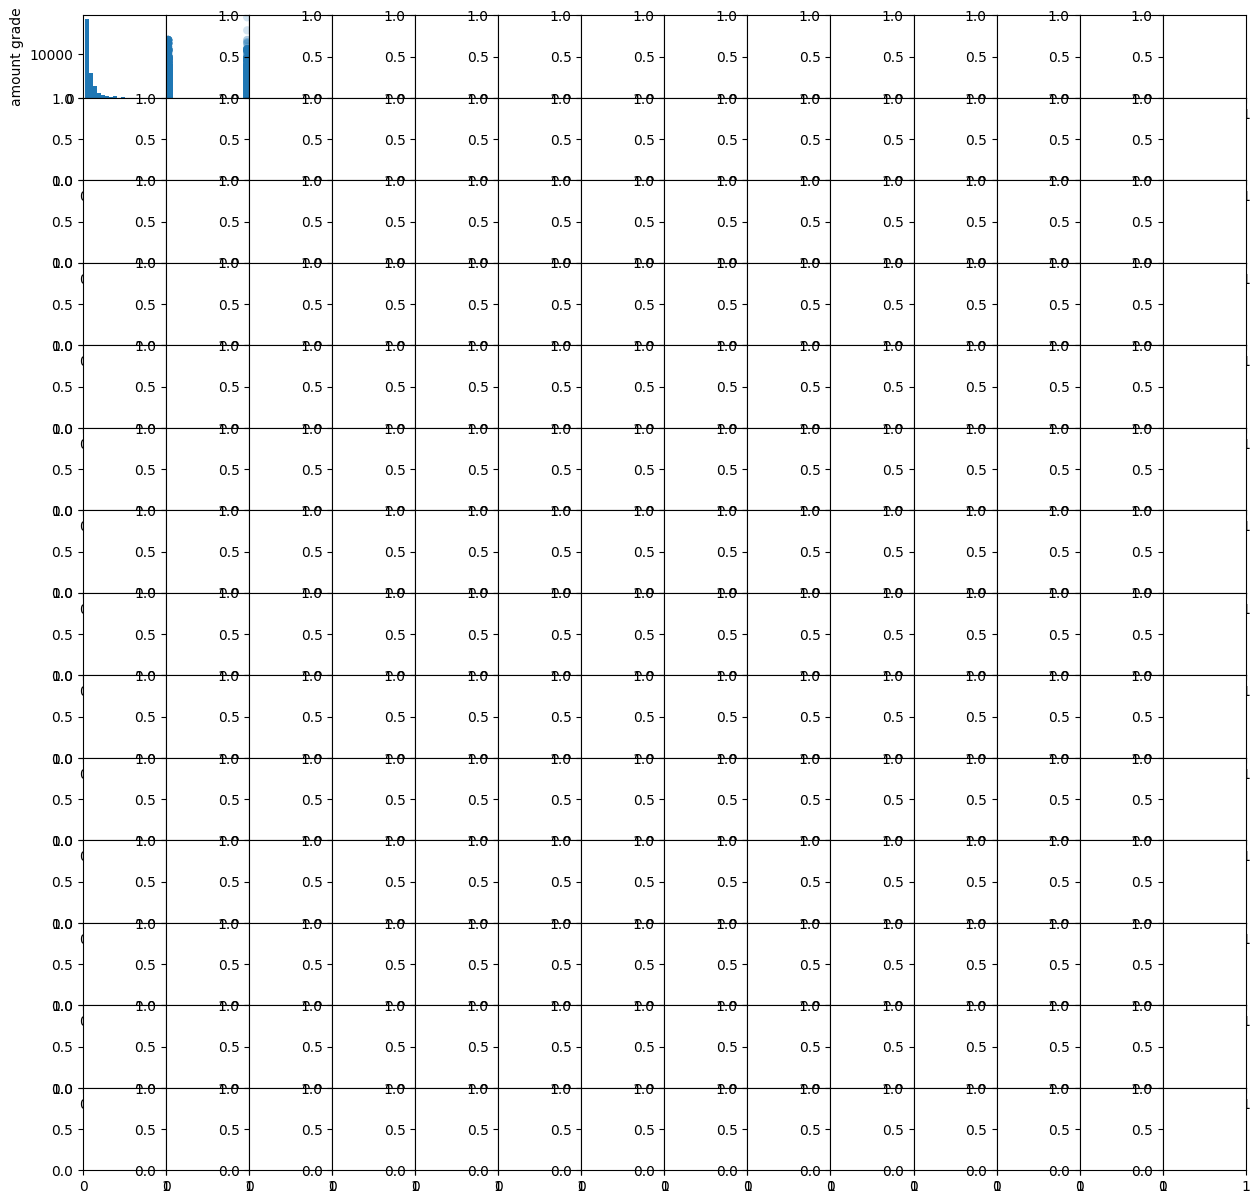

In [ ]:
from pandas.plotting import scatter_matrix

# Convert 'default' to numeric for visualization
combined_data['default'] = pd.to_numeric(combined_data['default'])

# Visualize the top correlated features using scatter_matrix
scatter_matrix(combined_data[selected_features], alpha=0.2, figsize=(15, 15), diagonal='hist', marker='o', grid=True, hist_kwds={'bins': 20})
plt.show()
